In [5]:
import pandas as pd
import tensorflow as tf

In [11]:
df=pd.read_csv('tesla.csv',sep=',')

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [14]:
df.shape

(1692, 7)

In [20]:
df1=df.reset_index()['Close']

In [21]:
df1.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

In [22]:
df1.shape

(1692,)

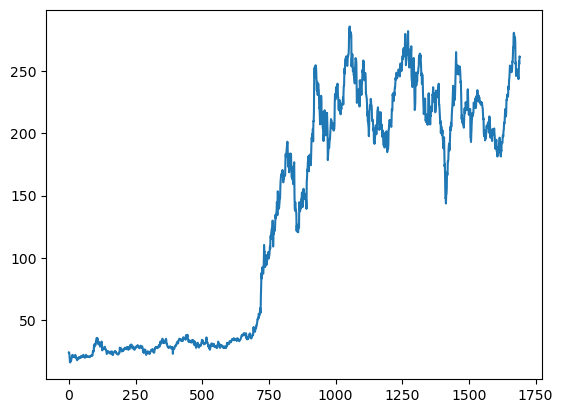

In [23]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [24]:
import numpy as np

In [25]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [29]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(1099, 593)

In [35]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX),numpy.array(dataY)

In [36]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)


In [38]:
print(X_train.shape),print(y_train.shape)

(998, 100)
(998,)


(None, None)

In [40]:
print(X_test.shape),print(ytest.shape)

(492, 100)
(492,)


(None, None)

In [41]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model=Sequential ()
model.add(LSTM(50, return_sequences=True, input_shape= (100, 1)))
model.add (LSTM(50, return_sequences=True)) 
model. add (LSTM (50)) 
model.add (Dense (1))
model.compile (loss='mean_squared_error',optimizer='adam')

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
16/16 [==============================] - 3s 103ms/step - loss: 0.0332 - val_loss: 0.0129
Epoch 2/50
16/16 [==============================] - 1s 76ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 3/50
16/16 [==============================] - 1s 78ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 4/50
16/16 [==============================] - 1s 81ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 5/50
16/16 [==============================] - 1s 82ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 6/50
16/16 [==============================] - 1s 82ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 7/50
16/16 [==============================] - 1s 79ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 8/50
16/16 [==============================] - 1s 82ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 9/50
16/16 [==============================] - 1s 80ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 10/50
16/16 [==============================] - 1s 81ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 11

In [54]:
tf.__version__

'2.13.0'

In [57]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 0s 11ms/step


In [59]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

31975.788506396104

In [62]:
math.sqrt(mean_squared_error(ytest,test_predict))

59702.32638370377

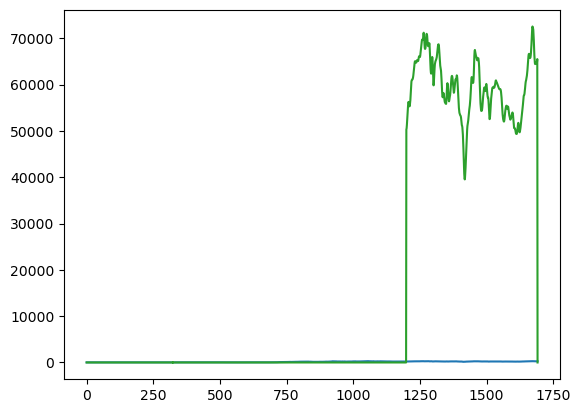

In [65]:

look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
testPredictplot=numpy.empty_like(df1)
trainPredictPlot[:, :]=numpy.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictplot)
plt.show()

In [66]:
len(test_data)

593

In [168]:
x_input=test_data[10:].reshape(1,-1)
x_input.shape

(1, 583)

In [169]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [170]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if (len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format (i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict (x_input, verbose=0)
        print("{} day output {)". format (i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend (yhat.tolist()) 
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict (x_input, verbose=0)
        print (yhat [0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend (yhat.tolist())
        i=i+1
print(lst_output)


        


0 day input [0.85449968 0.85956923 0.8608644  0.84635878 0.79869742 0.79792031
 0.79003847 0.78626403 0.76935317 0.73475427 0.74411631 0.71802838
 0.71447602 0.70751922 0.69656597 0.6735124  0.70315276 0.74918587
 0.75299728 0.7652457  0.75921401 0.76398752 0.78456187 0.776754
 0.76387651 0.76454262 0.75307131 0.71895348 0.72335699 0.72213584
 0.7209147  0.70626109 0.68979426 0.69734308 0.6545663  0.65153193
 0.65597247 0.65175395 0.66892392 0.68761097 0.68638983 0.70585404
 0.70374478 0.67928504 0.70085846 0.69493783 0.72209886 0.74955593
 0.75025902 0.75928803 0.74585551 0.74629955 0.74189604 0.72898163
 0.69227353 0.6955669  0.69771314 0.69812019 0.7249482  0.74493041
 0.70877734 0.69682502 0.69552986 0.7082223  0.69397569 0.67173622
 0.67998813 0.69064534 0.6839476  0.6589698  0.64786856 0.64579633
 0.65845174 0.64857164 0.6397276  0.66570453 0.66211512 0.68424364
 0.66551949 0.67451153 0.68024718 0.68798103 0.66052397 0.64612936
 0.6261101  0.64672144 0.64006068 0.63569416 0.64831

ValueError: cannot reshape array of size 582 into shape (1,100,1)

In [171]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [172]:
import matplotlib.pyplot as plt

In [173]:
len(df1)-100

1592

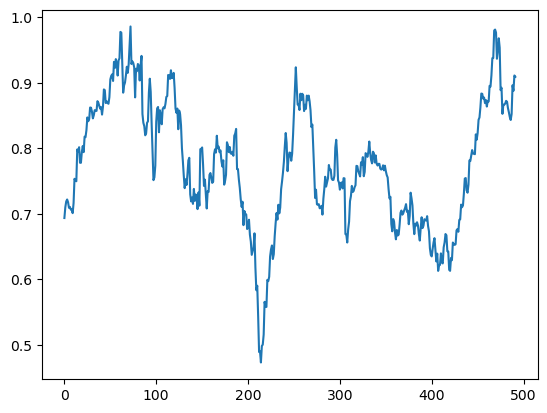

In [133]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

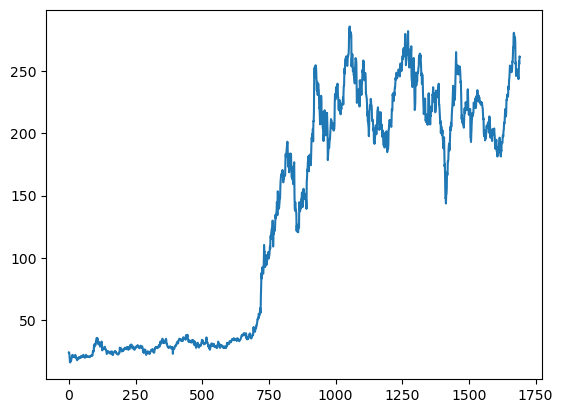

In [123]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)